# Titanic Project
   > * Supervisor: Eng.Ahmed Abu ELkher
   > * By: Hossam Saad


### Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


### Data Cleansing

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

### Data Processing With Training data

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
round(train_df.describe(),2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [7]:
round((train_df.isnull().sum()/len(train_df))*100,2).sort_values(ascending= False)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [8]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
# train_df.isnull().sum()

In [9]:
train_df['nickname']=0
for i in train_df:
    train_df['nickname']=train_df.Name.str.extract('([A-Za-z]+)\.')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nickname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [10]:
pd.crosstab(train_df.nickname,train_df.Sex).T.style

nickname,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [11]:
train_df['nickname'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [12]:
train_df.groupby('nickname')[['Age']].mean()

,Age
nickname,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [13]:
train_df.loc[(train_df.Age.isnull())&(train_df.nickname=='Mr'),'Age']=33
train_df.loc[(train_df.Age.isnull())&(train_df.nickname=='Mrs'),'Age']=36
train_df.loc[(train_df.Age.isnull())&(train_df.nickname=='Master'),'Age']=5
train_df.loc[(train_df.Age.isnull())&(train_df.nickname=='Miss'),'Age']=22
train_df.loc[(train_df.Age.isnull())&(train_df.nickname=='Other'),'Age']=46

In [14]:
# round((train_df.isnull().sum()/len(train_df))*100,2).sort_values(ascending= False)

### Explaratory Data Anlysis

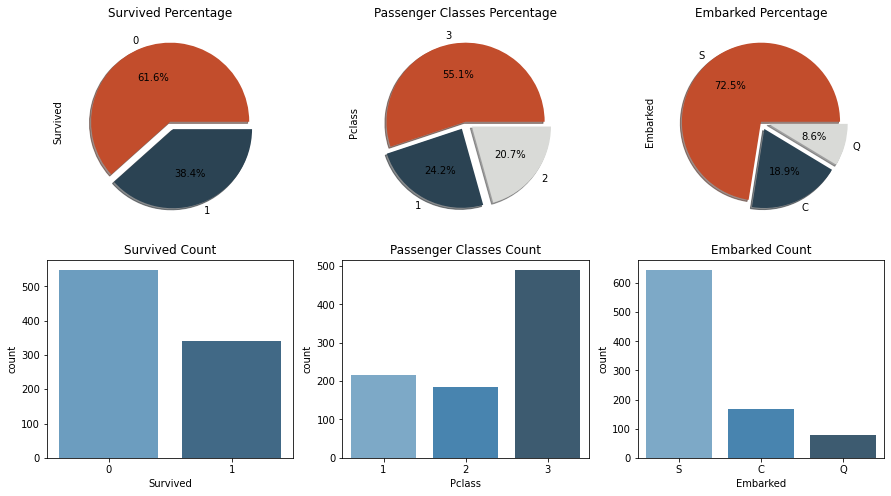

In [15]:
# Survived type, Calss and Embarked Explaratory
f,ax=plt.subplots(2,3,figsize=(15,8))

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True,ax=ax[0,0],colors=['#c24d2c','#2b4353'])
ax[0,0].set_title('Survived Percentage')
sns.countplot(x=train_df['Survived'],ax=ax[1,0],palette='Blues_d')
ax[1,0].set_title('Survived Count')

train_df['Pclass'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',shadow=True,ax=ax[0,1],colors=['#c24d2c','#2b4353','#d9dad7'])
ax[0,1].set_title('Passenger Classes Percentage')
sns.countplot(x=train_df['Pclass'],ax=ax[1,1],palette='Blues_d')
ax[1,1].set_title('Passenger Classes Count')

train_df['Embarked'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',shadow=True,ax=ax[0,2],colors=['#c24d2c','#2b4353','#d9dad7'])
ax[0,2].set_title('Embarked Percentage')
sns.countplot(x=train_df['Embarked'],ax=ax[1,2],palette='Blues_d')
ax[1,2].set_title('Embarked Count')

plt.show()

In [16]:
#Total passenger per Survived type
# train_df.groupby(['Pclass','Survived'])['Survived'].count()

Text(0.5, 1.0, 'Avg Survived female')

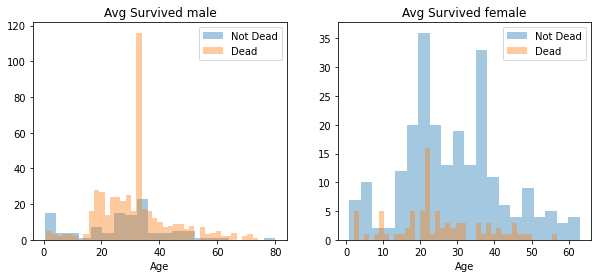

In [17]:
# Plotting Age Distribution based on Survived and Sex Categories
feature, axes = plt.subplots(1, 2, figsize = (10, 4))
ax = sns.distplot(train_df[(train_df['Sex']=='male') & (train_df['Survived'] == 1)].Age.dropna(), bins = 20,
                  label = 'Not Dead',ax = axes[0], kde = False)
ax = sns.distplot(train_df[(train_df['Sex']=='male') & (train_df['Survived'] == 0)].Age.dropna(), bins = 40,
                  label = 'Dead', ax = axes[0], kde = False)
ax.legend()
                  
ax.set_title('Avg Survived male')
ax = sns.distplot(train_df[(train_df['Sex']=='female') & (train_df['Survived'] == 1)].Age.dropna(), bins = 20,
                  label = 'Not Dead', ax = axes[1], kde = False)
ax = sns.distplot(train_df[(train_df['Sex']=='female') & (train_df['Survived'] == 0)].Age.dropna(), bins = 40,
                  label = 'Dead', ax = axes[1], kde = False)
ax.legend()
ax.set_title('Avg Survived female')

In [18]:
#Total passenger per Survived type
pd.crosstab(train_df.Pclass,train_df.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


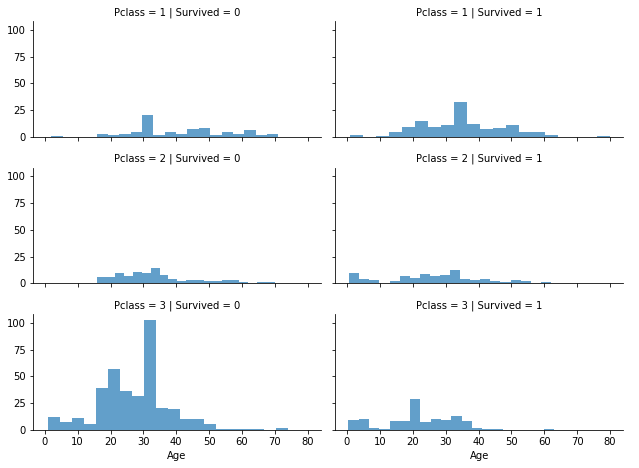

In [19]:
#plotting age distribution based on class and survived categories
grid = sns.FacetGrid(train_df, col= 'Survived', row= 'Pclass', size= 2.2, aspect= 2.0)
grid.map(plt.hist,'Age', alpha = 0.7, bins = 20)
grid.add_legend()

In [20]:
#Total Sex per Survived type
# train_df.groupby(['Sex','Survived'])['Survived'].count()

In [21]:
#Total Sex per Survived type
pd.crosstab(train_df.Sex,train_df.Survived,margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


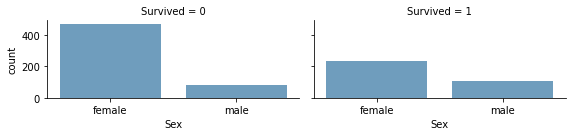

In [22]:
#plotting Sex Count based on survived category
grid = sns.FacetGrid(train_df, col= 'Survived', size= 2, aspect= 2)
grid.map(sns.countplot,'Sex', alpha = 0.7)
grid.add_legend()

In [23]:
#Total passneger for each calss based on Sex and Survived categories
# train_df.groupby(['Sex','Survived','Pclass'])['Pclass'].count()

In [24]:
#Total passneger for each calss based on Sex and Survived categories
pd.crosstab([train_df.Sex,train_df.Survived],train_df.Pclass,margins=True)

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

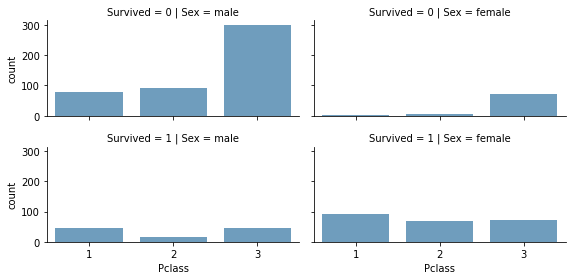

In [25]:
#Plotting total passengers for each calss based on Sex and Survived categories
grid = sns.FacetGrid(train_df, col= 'Sex', row='Survived' ,size= 2, aspect= 2)
grid.map(sns.countplot,'Pclass', alpha = 0.7)
grid.add_legend()

In [26]:
pd.crosstab([train_df.Survived],train_df.Embarked,margins=True)

Embarked,C,Q,S,All
Survived,,,,
0,75,47,427,549
1,93,30,219,342
All,168,77,646,891


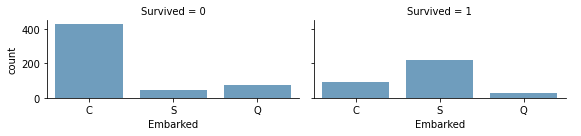

In [27]:
grid = sns.FacetGrid(train_df, col= 'Survived' ,size= 2, aspect= 2)
grid.map(sns.countplot,'Embarked', alpha = 0.7)
grid.add_legend()

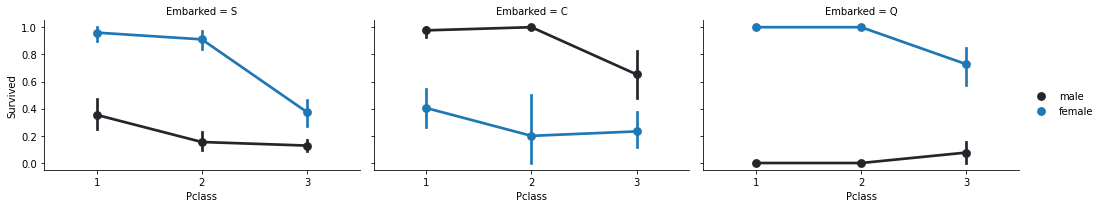

In [28]:
#Embarked Survived Percentage For each Class and Sex Categories
FacetGrid = sns.FacetGrid(train_df, col = 'Embarked', size = 3, aspect = 1.6)
FacetGrid.map(sns.pointplot,'Pclass','Survived','Sex')
FacetGrid.add_legend()

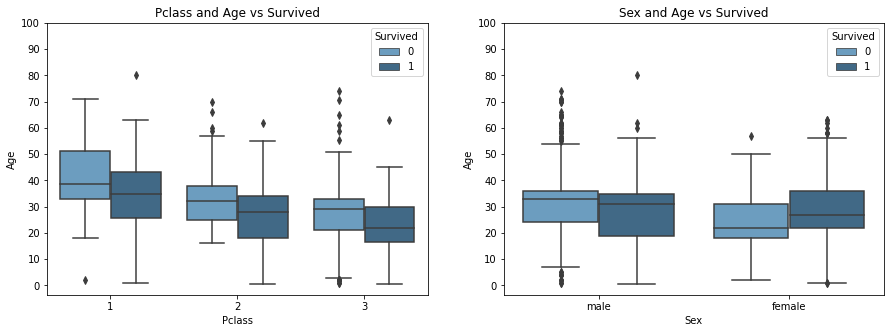

In [29]:
# Plooting Age Distribution For each Class based on Survived type
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.boxplot("Pclass","Age", hue="Survived", data=train_df,ax=ax[0],palette='Blues_d')
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.boxplot("Sex","Age", hue="Survived", data=train_df,ax=ax[1],palette='Blues_d')
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [30]:
pd.crosstab([train_df.Survived],train_df.SibSp,margins=True)

SibSp,0,1,2,3,4,5,8,All
Survived,,,,,,,,
0,398,97,15,12,15,5,7,549
1,210,112,13,4,3,0,0,342
All,608,209,28,16,18,5,7,891


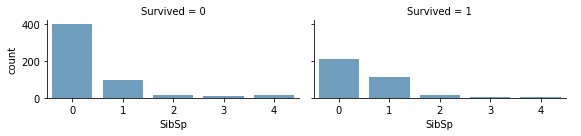

In [31]:
grid = sns.FacetGrid(train_df, col= 'Survived' ,size= 2, aspect= 2)
grid.map(sns.countplot,'SibSp', alpha = 0.7)
grid.add_legend()

In [32]:
pd.crosstab([train_df.Survived],train_df.Parch,margins=True)

Parch,0,1,2,3,4,5,6,All
Survived,,,,,,,,
0,445,53,40,2,4,4,1,549
1,233,65,40,3,0,1,0,342
All,678,118,80,5,4,5,1,891


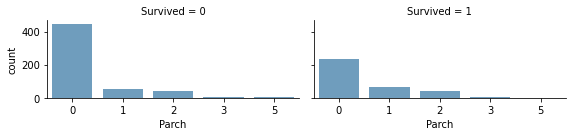

In [33]:
grid = sns.FacetGrid(train_df, col= 'Survived' ,size= 2, aspect= 2)
grid.map(sns.countplot,'Parch', alpha = 0.7)
grid.add_legend()

In [34]:
train_df = train_df.drop(columns=['Name','Ticket','Cabin'])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,nickname
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


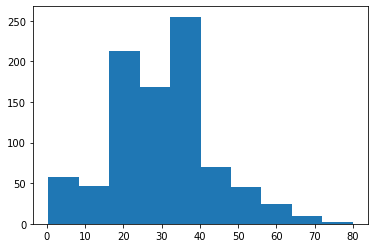

In [35]:
plt.hist(train_df.Age)
plt.show()

In [36]:
#replace continous age with age band 
train_df['Age_Catg']=0
train_df.loc[train_df['Age']<=16,'Age_Catg']=0
train_df.loc[(train_df['Age']>16)&(train_df['Age']<=32),'Age_Catg']=1
train_df.loc[(train_df['Age']>32)&(train_df['Age']<=48),'Age_Catg']=2
train_df.loc[(train_df['Age']>48)&(train_df['Age']<=64),'Age_Catg']=3
train_df.loc[train_df['Age']>64,'Age_Catg']=4
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,nickname,Age_Catg
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,1
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,2
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,1
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,2
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,2


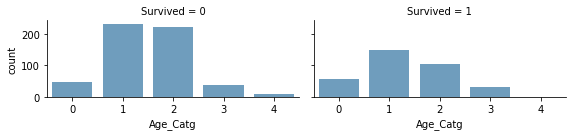

In [37]:
grid = sns.FacetGrid(train_df, col= 'Survived',size= 2, aspect= 2)
grid.map(sns.countplot,'Age_Catg', alpha = 0.7)
grid.add_legend()

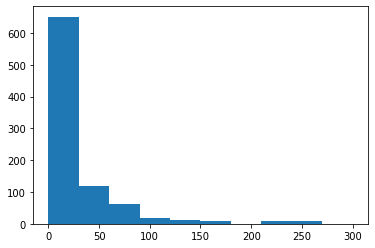

In [38]:
plt.hist(train_df.Fare,range=(0,300))
plt.show()

In [39]:
# deal with fare column with the same approach
train_df['Fare_catg']=0
train_df.loc[train_df['Fare']<=8,'Fare_catg']=0
train_df.loc[(train_df['Fare']>8)&(train_df['Fare']<=15),'Fare_catg']=1
train_df.loc[(train_df['Fare']>15)&(train_df['Fare']<=30),'Fare_catg']=2
train_df.loc[train_df['Fare']>30,'Fare_catg']=3

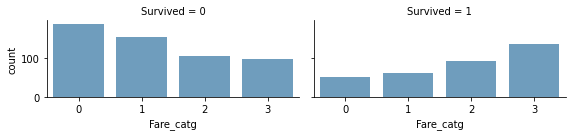

In [40]:
grid = sns.FacetGrid(train_df, col= 'Survived',size= 2, aspect= 2)
grid.map(sns.countplot,'Fare_catg', alpha = 0.7)
grid.add_legend()

In [41]:
train_df['Family']=0
train_df['Family']=train_df['Parch']+train_df['SibSp']
train_df['Alone']=0
train_df.loc[train_df.Family==0,'Alone']=1

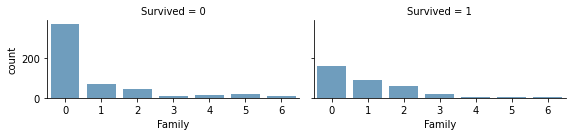

In [42]:
grid = sns.FacetGrid(train_df, col= 'Survived',size= 2, aspect= 2)
grid.map(sns.countplot,'Family', alpha = 0.7)
grid.add_legend()

In [43]:
train_df['Sex'].replace(['male','female'],[0,1],inplace=True)
train_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train_df['nickname'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [44]:
train_df.drop(['Fare','Age'], axis = 1, inplace = True)

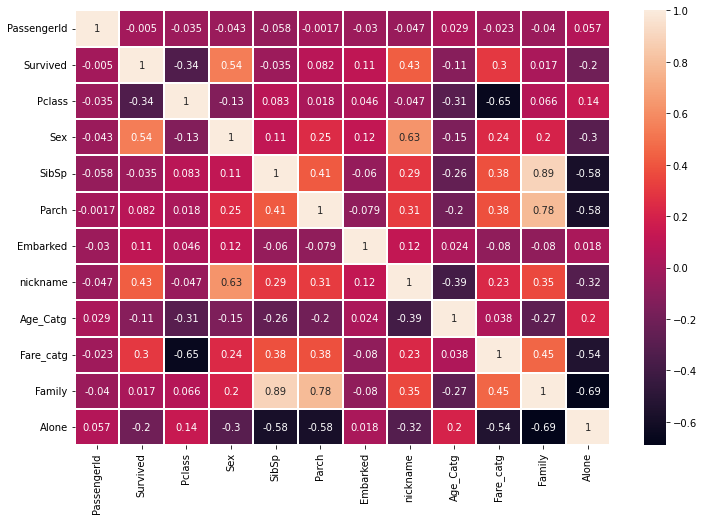

In [45]:
sns.heatmap(train_df.corr(),annot=True,linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Data Processing with testing Data

In [46]:

test_df['nickname']=0
for i in test_df:
    test_df['nickname']=test_df.Name.str.extract('([A-Za-z]+)\.')

test_df['nickname'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Dona'],
                            ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

# test_df.drop(test_df[test_df['nickname'] == 'Dona'].index, inplace = True)

In [47]:
# test_df.groupby('nickname')[['Age']].mean()
test_df.loc[(test_df.Age.isnull())&(test_df.nickname=='Mr'),'Age']=33
test_df.loc[(test_df.Age.isnull())&(test_df.nickname=='Mrs'),'Age']=36
test_df.loc[(test_df.Age.isnull())&(test_df.nickname=='Master'),'Age']=5
test_df.loc[(test_df.Age.isnull())&(test_df.nickname=='Miss'),'Age']=22
test_df.loc[(test_df.Age.isnull())&(test_df.nickname=='Other'),'Age']=46

In [48]:
# deal with fare column with the same approach
test_df['Fare_catg']=0
test_df.loc[test_df['Fare']<=8,'Fare_catg']=0
test_df.loc[(test_df['Fare']>8)&(test_df['Fare']<=15),'Fare_catg']=1
test_df.loc[(test_df['Fare']>15)&(test_df['Fare']<=30),'Fare_catg']=2
test_df.loc[test_df['Fare']>30,'Fare_catg']=3

In [49]:
test_df['Family']=0
test_df['Family']=test_df['Parch']+test_df['SibSp']
test_df['Alone']=0
test_df.loc[test_df.Family==0,'Alone']=1

In [50]:
test_df['Sex'].replace(['male','female'],[0,1],inplace=True)
test_df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_df['nickname'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [51]:
train = train_df.drop('Survived', axis = 1)
label = train_df['Survived']
label = pd.DataFrame(label)

In [52]:
test_df['Age_Catg']=0
test_df.loc[test_df['Age']<=16,'Age_Catg']=0
test_df.loc[(test_df['Age']>16)&(test_df['Age']<=32),'Age_Catg']=1
test_df.loc[(test_df['Age']>32)&(test_df['Age']<=48),'Age_Catg']=2
test_df.loc[(test_df['Age']>48)&(test_df['Age']<=64),'Age_Catg']=3
test_df.loc[test_df['Age']>64,'Age_Catg']=4

In [53]:
test=test_df.drop(columns=['Fare','Name','Ticket','Age','Cabin','PassengerId'])
test.head()

,Pclass,Sex,SibSp,Parch,Embarked,nickname,Fare_catg,Family,Alone,Age_Catg
0,3,0,0,0,2,0,0,0,1,2
1,3,1,1,0,0,1,0,1,0,2
2,2,0,0,0,2,0,1,0,1,3
3,3,0,0,0,0,0,1,0,1,1
4,3,1,1,1,0,1,1,2,0,1


In [54]:
train_df=train_df.drop(columns=['PassengerId'])
train_df.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,nickname,Age_Catg,Fare_catg,Family,Alone
0,0,3,0,1,0,0,0,1,0,1,0
1,1,1,1,1,0,1,1,2,3,1,0
2,1,3,1,0,0,0,2,1,0,0,1
3,1,1,1,1,0,0,1,2,3,1,0
4,0,3,0,0,0,0,0,2,1,0,1


In [55]:
train=train_df.drop('Survived',axis=1)
label = pd.DataFrame(train_df['Survived'])

### Split data for modeling

In [56]:
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.2, random_state=0)

In [57]:
# Decicion Tree Model

dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
tr_predict_dt = dt_model.predict(x_test)

dt_train_acc = round(dt_model.score(x_train, y_train) * 100, 2)
dt_test_acc =round(accuracy_score(y_test, tr_predict_dt)*100,2)
print('Train accuracy: {} \nTest accuracy: {}'.format(dt_train_acc,dt_test_acc))

ts_pred=dt_model.predict(test)

Train accuracy: 88.76 
Test accuracy: 83.24


In [58]:
dct_output = pd.DataFrame()
dct_output['PassengerId']=test_df.PassengerId
dct_output['Survived']=ts_pred
dct_output.to_csv('dct_submission.csv')
dct_output.set_index('PassengerId').to_csv('dct_submission.csv')

In [59]:
#Random Forest Classifier model
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
tr_predict_rf = random_forest.predict(x_test)
rf_train_acc = round(random_forest.score(x_train, y_train) * 100, 2)
rf_test_acc =round(accuracy_score(y_test, tr_predict_rf)*100,2)
print('Train accuracy: {} \nTest accuracy: {}'.format(rf_train_acc,rf_test_acc))

Train accuracy: 88.76 
Test accuracy: 84.92


In [60]:
rf_output = pd.DataFrame()
rf_output['PassengerId']=test_df.PassengerId
rf_output['Survived']=ts_pred
rf_output.to_csv('rf_submission.csv')
rf_output.set_index('PassengerId').to_csv('rf_submission.csv')